# MAP Classifiers

## Introduction

In this notebook I am going to implement 2 type of Maximum Aposterior Classifiers:
* Naive Bayes
* Full Bayes

## Recap

For given $C$ classes, and a given instance $x$ (with $n$ features), our motivation is to build a model to predict which class $x$ belongs to. Based on training data, we can take $argmax_{C_i}P(x | C_i)$

Taking maximum likelyhood will allow us predict the probability of $x$, given it's classified $C_i$. But we want to predict to probabily of being classified $C_i$, given the instance $x$.<br>
Define the posterior probabily:
$P(C_i | x)$

### Bayes' theorem

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event (Wikipedia).

The Bayes equation:
$$P(A | x) = \frac{P(x | A)P(A)}{P(x)}$$

Where:
* $P(x)$ is the prior probability
* $P(x | A)$ is the likelyhood
* $P(A | x)$ is the posterior probability

So, We wish to find:
$$argmax_{C_i}\frac{P(x | C_i)P(C_i)}{P(x)} \Longrightarrow argmax_{C_i}P(x | C_i)P(C_i)$$

Note that if $P(C_1) = P(C_2) = ... = P(C_n)$ ($P(C_i)$ uniformly distributed) then maximum likelyhood shall be applied (ML classifier).<br>
Otherwise, we will calculate the postretior probability using Bayes.

In [ ]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will work with following data:

In [209]:
df = pd.read_csv('./data.csv')
df.describe()

,x,y,label
count,600.000000,600.000000,600.000000
mean,25.298157,25.429497,0.500000
std,4.973121,5.907285,0.500417
min,9.706791,6.491183,0.000000
25%,22.137139,21.458097,0.000000
50%,25.474354,25.585356,0.500000
75%,28.993773,29.662791,1.000000
max,40.783340,44.227261,1.000000


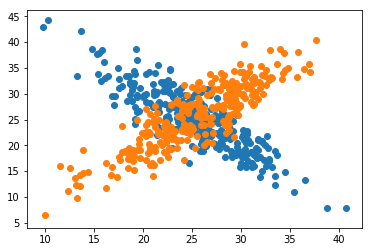

In [214]:
dataset = df.values
plt.scatter(dataset[dataset[:,2] == 1][:,0], dataset[dataset[:,2] == 1][:,1])
plt.scatter(dataset[dataset[:,2] == 0][:,0], dataset[dataset[:,2] == 0][:,1])

## Preprocessing Data
**Let's implement:**